In [116]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [117]:
path='/home/pdirmeye/classes/clim680_2022/CLIM_INDICES/'
file='nao.data'
index_name='nao'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df.drop(df.tail(3).index,inplace=True)

In [118]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'

In [119]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')

In [120]:
clim_index=df.T.unstack().values
clim_index=clim_index.astype('float32')

In [121]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='nao')
ds_index

<xarray.Dataset>
Dimensions:  (time: 876)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    nao      (time) float32 nan nan nan nan nan nan ... 0.03 1.11 nan nan nan

In [122]:
ds_index_g = ds_index.groupby('time.season').groups

In [123]:
ds_index_MAM = ds_index_g['MAM']

In [124]:
ds_index_spring = ds_index.isel(time=ds_index_MAM)
ds_index_spring

<xarray.Dataset>
Dimensions:  (time: 219)
Coordinates:
  * time     (time) datetime64[ns] 1948-03-01 1948-04-01 ... 2020-05-01
Data variables:
    nao      (time) float32 nan nan nan nan nan ... 0.36 -2.38 0.66 -1.26 -0.33

In [125]:
dg_index_spring = ds_index_spring.groupby('time.year').mean()

Text(0, 0.5, 'NAO Index')

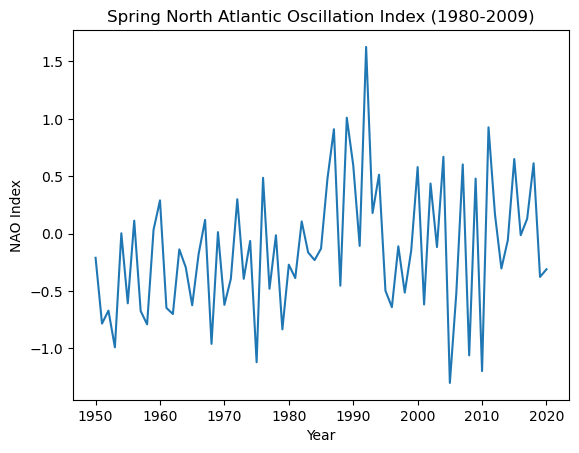

In [126]:
plt.plot(dg_index_spring['year'], dg_index_spring['nao'])
plt.title('Spring North Atlantic Oscillation Index (1980-2009)')
plt.xlabel('Year')
plt.ylabel('NAO Index')

Positive NAO:  11
Neutral NAO:  40
Negative NAO:  20
[array(11), array(20), array(40)]


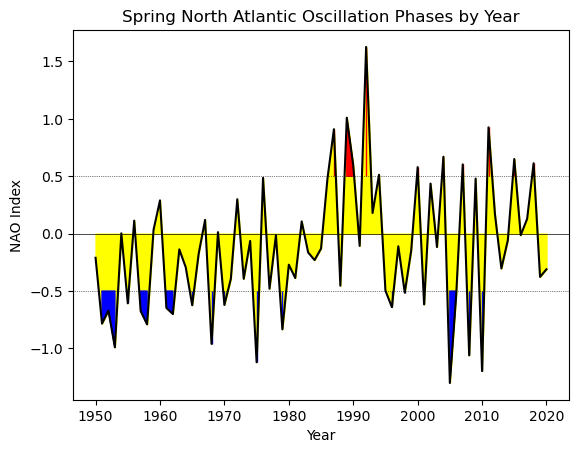

In [127]:
positivenao=dg_index_spring['nao'].where(dg_index_spring['nao']>=0.5)
negativenao=dg_index_spring['nao'].where(dg_index_spring['nao']<=-0.5)
neutralnao=dg_index_spring['nao'].where(np.logical_and(dg_index_spring['nao']>-0.5, dg_index_spring['nao']<0.5))

plt.plot(dg_index_spring['year'],dg_index_spring['nao'],color='k')
plt.fill_between(dg_index_spring['year'].values,dg_index_spring['nao'],color='yellow')
plt.fill_between(dg_index_spring['year'].values,positivenao,y2=0.5,color='red')
plt.fill_between(dg_index_spring['year'].values,negativenao,y2=-0.5,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(0.5,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.5,color='black',linewidth=0.5,linestyle='dotted')
plt.title('Spring North Atlantic Oscillation Phases by Year')
plt.xlabel('Year')
plt.ylabel('NAO Index')
plt.savefig('era5_comp1.png', bbox_inches='tight')

print('Positive NAO: ',positivenao.count(dim='year').values)
print('Neutral NAO: ',neutralnao.count(dim='year').values)
print('Negative NAO: ',negativenao.count(dim='year').values)

counts=[positivenao.count(dim='year').values, 
        negativenao.count(dim='year').values, 
        neutralnao.count(dim='year').values]
print(counts)

In [128]:
file_era5 = '/home/dgray24/ea_moda_fc_mtpr.nc'
ds = xr.open_dataset(file_era5)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, time: 504)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [129]:
SlicedData = ds.sel(latitude=slice(40,36),
                longitude=slice(-84,-74))

ds_era5 = SlicedData.sel(time=slice('1980-01-01','2009-12-31'))
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [130]:
ds_era5 = ds_era5 * 86400
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float64 1.502 1.502 ... 5.786 6.254
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [131]:
dg = ds_era5.groupby('time.season').groups

In [132]:
dg_M = dg['MAM']

In [133]:
ds_MAM = ds_era5.isel(time=dg_M)
ds_MAM

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 90)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-03-01 1980-04-01 ... 2009-05-01
Data variables:
    mtpr       (time, latitude, longitude) float64 5.196 5.196 ... 2.608 2.858
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [134]:
dg_MAM = ds_MAM.mtpr.groupby('time.year').mean()
dg_MAM

<xarray.DataArray 'mtpr' (year: 30, latitude: 14, longitude: 35)>
array([[[3.6907196 , 3.6907196 , 3.66153717, ..., 3.90701294,
         4.24175262, 4.60739136],
        [3.6151886 , 3.6151886 , 3.39460373, ..., 4.04520035,
         4.24003601, 5.5103302 ],
        [3.47356796, 3.47356796, 3.31907272, ..., 3.81774902,
         4.81424332, 4.8992157 ],
        ...,
        [4.65459824, 4.65459824, 5.04512787, ..., 3.00836563,
         3.00836563, 3.34224701],
        [4.75759506, 4.75759506, 4.84857559, ..., 3.22551727,
         3.22551727, 3.30448151],
        [3.97052765, 3.97052765, 3.94392014, ..., 3.25298309,
         3.25298309, 3.45211029]],

       [[3.57055664, 3.57055664, 3.42292786, ..., 2.65989304,
         2.76975632, 2.65388489],
        [3.71732712, 3.71732712, 3.23753357, ..., 2.88734436,
         2.87790298, 2.99291611],
        [3.85465622, 3.85465622, 3.70788574, ..., 2.70452499,
         2.9800415 , 2.64530182],
...
        [3.48644257, 3.48644257, 3.6907196 , ..., 2.90107727,
         2.90107727, 2.81009674],
        [3.30018997, 3.30018997, 3.53965759, ..., 2.69851685,
         2.69851685, 2.74400711],
        [2.76374817, 2.76374817, 2.62813568, ..., 3.14569473,
         3.14569473, 2.83670425]],

       [[3.14826965, 3.14826965, 3.21350098, ..., 3.00836563,
         3.05299759, 2.93970108],
        [2.98089981, 2.98089981, 2.87704468, ..., 3.41520309,
         3.15942764, 3.69501114],
        [3.16371918, 3.16371918, 3.36713791, ..., 3.68900299,
         4.05464172, 3.96795273],
        ...,
        [4.68549728, 4.68549728, 4.33702469, ..., 3.35855484,
         3.35855484, 3.63836288],
        [4.38680649, 4.38680649, 4.13446426, ..., 3.4409523 ,
         3.4409523 , 3.72333527],
        [3.12080383, 3.12080383, 3.10792923, ..., 3.62377167,
         3.62377167, 4.29582596]]])
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2006 2007 2008 2009

In [135]:
da_climo = dg_MAM.mean()
da_anoms = dg_MAM - da_climo
da_anoms

<xarray.DataArray 'mtpr' (year: 30, latitude: 14, longitude: 35)>
array([[[ 0.25223759,  0.25223759,  0.22305516, ...,  0.46853093,
          0.80327061,  1.16890935],
        [ 0.17670659,  0.17670659, -0.04387828, ...,  0.60671834,
          0.801554  ,  2.07184819],
        [ 0.03508595,  0.03508595, -0.11940929, ...,  0.37926701,
          1.3757613 ,  1.46073369],
        ...,
        [ 1.21611622,  1.21611622,  1.60664586, ..., -0.43011638,
         -0.43011638, -0.096235  ],
        [ 1.31911305,  1.31911305,  1.41009358, ..., -0.21296474,
         -0.21296474, -0.13400051],
        [ 0.53204564,  0.53204564,  0.50543812, ..., -0.18549892,
         -0.18549892,  0.01362828]],

       [[ 0.13207463,  0.13207463, -0.01555416, ..., -0.77858898,
         -0.66872569, -0.78459712],
        [ 0.27884511,  0.27884511, -0.20094844, ..., -0.55113765,
         -0.56057903, -0.4455659 ],
        [ 0.41617421,  0.41617421,  0.26940373, ..., -0.73395702,
         -0.45844051, -0.79318019],
...
        [ 0.04796055,  0.04796055,  0.25223759, ..., -0.53740474,
         -0.53740474, -0.62838527],
        [-0.13829204, -0.13829204,  0.10117558, ..., -0.73996517,
         -0.73996517, -0.6944749 ],
        [-0.67473384, -0.67473384, -0.81034633, ..., -0.29278728,
         -0.29278728, -0.60177776]],

       [[-0.29021236, -0.29021236, -0.22498104, ..., -0.43011638,
         -0.38548442, -0.49878093],
        [-0.4575822 , -0.4575822 , -0.56143733, ..., -0.02327892,
         -0.27905437,  0.25652913],
        [-0.27476283, -0.27476283, -0.0713441 , ...,  0.25052098,
          0.61615971,  0.52947072],
        ...,
        [ 1.24701527,  1.24701527,  0.89854268, ..., -0.07992717,
         -0.07992717,  0.19988087],
        [ 0.94832448,  0.94832448,  0.69598225, ...,  0.00247029,
          0.00247029,  0.28485325],
        [-0.31767818, -0.31767818, -0.33055278, ...,  0.18528966,
          0.18528966,  0.85734395]]])
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2006 2007 2008 2009

In [136]:
positivenao_g = positivenao.sel(year=slice(dg_MAM['year'][0],dg_MAM['year'][-1]))
neutralnao_g = neutralnao.sel(year=slice(dg_MAM['year'][0],dg_MAM['year'][-1]))
negativenao_g = negativenao.sel(year=slice(dg_MAM['year'][0],dg_MAM['year'][-1]))

In [137]:
positivenao_precip = da_anoms.sel(year=positivenao_g.dropna(dim='year')['year']).mean(dim='year')
neutralnao_precip = da_anoms.sel(year=neutralnao_g.dropna(dim='year')['year']).mean(dim='year')
negativenao_precip = da_anoms.sel(year=negativenao_g.dropna(dim='year')['year']).mean(dim='year')

comp_precip = [positivenao_precip, neutralnao_precip, negativenao_precip]
comp_precip

[<xarray.DataArray 'mtpr' (latitude: 14, longitude: 35)>
 array([[-0.09709331, -0.09709331, -0.10095569, -0.13829204,  0.12874869,
          0.18818644,  0.18818644,  0.25888947,  0.32851962,  0.5517867 ,
          0.58740643,  0.58740643,  0.64652232,  0.90122489,  0.52614478,
          0.8854535 ,  0.8854535 ,  0.66401032, -0.0096533 , -0.28645727,
          0.0908759 ,  0.0908759 , -0.05342695, -0.02166959, -0.09559127,
          0.17895964,  0.17895964,  0.14173058,  0.28206376,  0.10224846,
         -0.16575786, -0.16575786, -0.0492427 ,  0.00740555, -0.1036379 ],
        [-0.08003446, -0.08003446, -0.20234319, -0.2889249 ,  0.11587409,
          0.15803841,  0.15803841,  0.1738098 ,  0.28850106,  0.59716967,
          0.54781703,  0.54781703,  0.89500216,  0.91313389,  0.75584916,
          1.11151007,  1.11151007,  0.2014902 , -0.46874019, -0.26542875,
         -0.00664922, -0.00664922, -0.13721916, -0.10653469, -0.02220603,
          0.1904395 ,  0.1904395 , -0.0299308 , -0.054

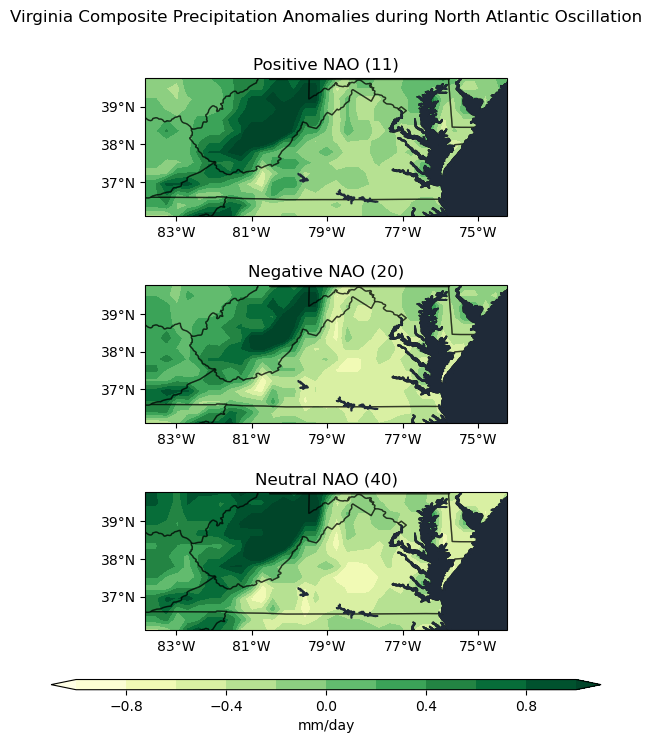

In [139]:
labels=['Positive NAO', 'Negative NAO', 'Neutral NAO']
clevs = np.arange(-1,1.2,0.2)

fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-78)},
                        figsize=(11,8.5))

axs = axs.flatten()

for i,mtpr in enumerate(comp_precip):

        data = comp_precip[i]

        cs=axs[i].contourf(comp_precip[i]['longitude'],comp_precip[i]['latitude'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='YlGn',extend='both')

        axs[i].set_xticks([-83,-81,-79,-77,-75], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks([37,38,39], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        axs[i].coastlines()
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        axs[i].add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Virginia Composite Precipitation Anomalies during North Atlantic Oscillation') ;

fig.savefig('era5_comp2.png', bbox_inches='tight')

In [140]:
diff_precip=[positivenao_precip-neutralnao_precip, negativenao_precip-neutralnao_precip]

In [141]:
p = 0.05

In [142]:
from scipy.stats import ttest_ind

positivenao_precip_vals = da_anoms.sel(year=positivenao_g.dropna(dim='year')['year'])
neutralnao_precip_vals = da_anoms.sel(year=neutralnao_g.dropna(dim='year')['year'])
negativenao_precip_vals = da_anoms.sel(year=negativenao_g.dropna(dim='year')['year'])

In [143]:
tstat,pval = ttest_ind(positivenao_precip_vals, 
                neutralnao_precip_vals, 
                equal_var = False)

Text(0.5, 1.0, 'T-Test Significance')

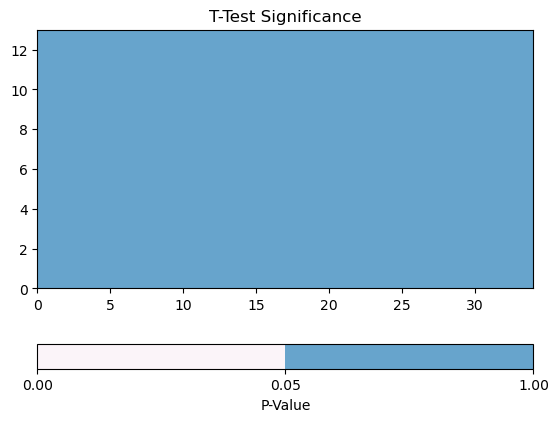

In [144]:
plt.contourf(pval,[0,0.05,1],cmap='PuBu') 
plt.colorbar(orientation='horizontal', label='P-Value') ;
plt.title('T-Test Significance')

In [145]:
mask_diff = diff_precip[0].where(pval <= p)
mask_diff

<xarray.DataArray 'mtpr' (latitude: 14, longitude: 35)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
...
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan]])
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11

Text(0.5, 0.98, 'Virginia Composite Precipitation Differences during North Atlantic Oscillation')

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


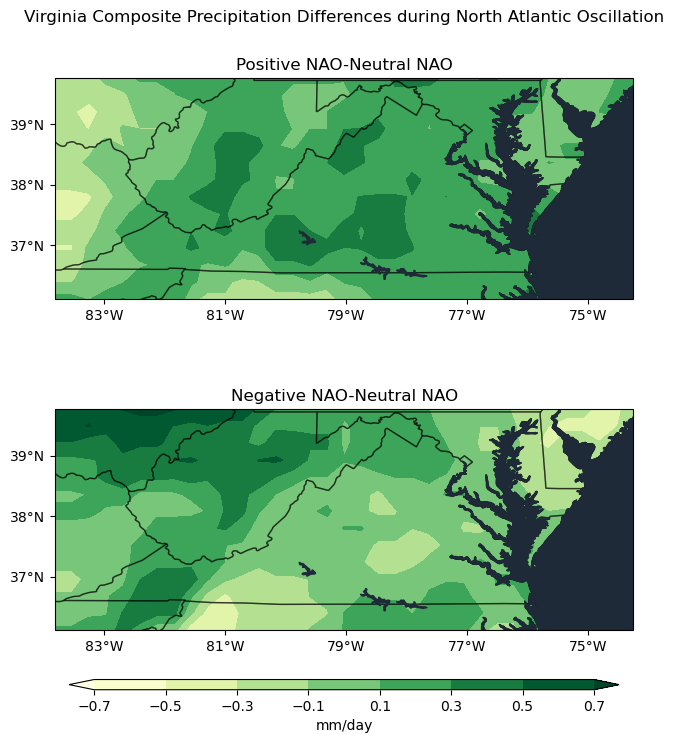

In [146]:
labels=['Positive NAO-Neutral NAO','Negative NAO-Neutral NAO']
clevs=np.arange(-0.7,0.8,0.2)

fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

axs = axs.flatten()

for i,enso in enumerate(diff_precip):

        data = diff_precip[i]

        cs = axs[i].contourf(diff_precip[i]['longitude'],diff_precip[i]['latitude'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='YlGn',extend='both')

        axs[i].set_xticks([-83,-81,-79,-77,-75], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        axs[i].set_yticks([37,38,39], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[i].set_title(labels[i])

        axs[i].coastlines()
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        axs[i].add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Virginia Composite Precipitation Differences during North Atlantic Oscillation')

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/matplotlib/contour.py:1491: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/matplotlib/contour.py:1492: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


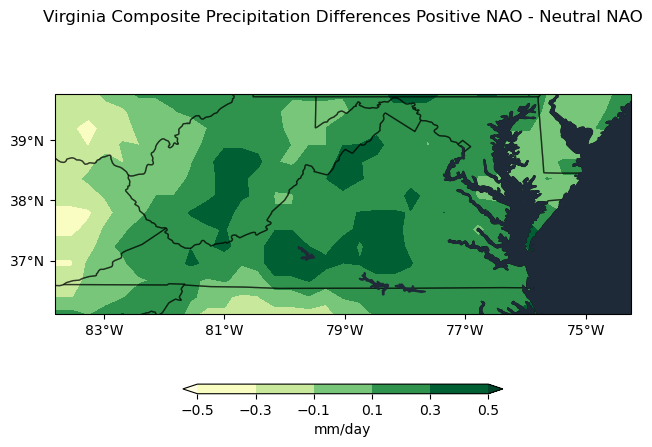

In [147]:
labels=['Positive NAO vs. Negative NAO']
clevs=np.arange(-0.5,0.7,0.2)
hatch_levs=[0]

fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-78)})


data=diff_precip[0]

#data,lons=add_cyclic_point(data,coord=diff_precip[0]['longitude'])
mask_data,lons=(mask_diff,diff_precip[0]['longitude'])

cs = axs.contourf(lons,diff_precip[0]['latitude'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='YlGn',extend='both')

ss=axs.contourf(lons,diff_precip[0]['latitude'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['...','..'],extend='both',alpha=0.0)

axs.set_xticks([-83,-81,-79,-77,-75], crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

axs.set_yticks([37,38,39], crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)

axs.coastlines()
axs.add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
axs.add_feature(feature.BORDERS, zorder=2, color='k')
axs.add_feature(feature.LAKES, zorder=3, color='#1F2A38')
axs.add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.02])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')

plt.suptitle('Virginia Composite Precipitation Differences Positive NAO - Neutral NAO')

fig.savefig('era5_comp3.png', bbox_inches='tight')